# Lesson 1: 線形回帰分析
### 学習内容
- 線形モデル：機械学習モデルの１つ．機械学習の理解に重要な基礎．
- 教師付き学習： 出力（目的変数，教師）が定量的なもの（比例尺度）
- 最小二乗法： 最適化法の一つ
- 重回帰分析： 入力（説明変数）が２つ以上
### 課題
- あるスーパーでのアイス菓子「ガリガリ君」の１年間の売上から，線形回帰により予測モデルを作ってみる．

## Pythonの追加ライブラリのインポート
- Pandas はデータ分析を行うもの
- NumPy は数値計算（配列や行列）を行うもの
- Matplotlib はグラフを描画するもの

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## データを2つ使う
- 売上データ・天気情報
- CSV形式で保存された売り上げデータを2つ読み込む．書式は下記の通り 
  (CSV: Comma Separated Value: コンマ ',' で区切られた値でのデータファイル保存形式）
- 変数名 = pd.read_csv("ファイル名")
- データ1: ファイル "weather2012.csv" ⇒ 2012年の関東地方の天気情報
- データ2: ファイル "garigari2012.csv" ⇒ 関東地方のある店舗での，アイス「ガリガリ君」の売り上げ

まず，ファイルがあるか確認しよう．

lsコマンドでディレクトリにあるファイルを確認する．  
（ "!ls" と "!" を付けて，UNIXのlsコマンドを実行する）

In [2]:
garigari = pd.read_csv("garigari2012.csv")

変数 garigari に "garigari.csv" を読み込む．
```
garigari = pd.read_csv("garigari2012.csv")
```

In [3]:
weather = pd.read_csv("weather2012.csv")

変数 weather に "weather2012.csv" を読み込む．
```
weather = pd.read_csv("weather2012.csv")
```

In [4]:
weather

,date,year,month,day,dayOfWeek,isHoliday,holidayName,weekNumber,Overview,rainfall,AverageTemp,MaxTemp,MinTemp,SolarRadiation
0,2012/1/1,2012,1,1,Sun,1,元日,1,曇,0.0,5.7,9.2,2.9,8.02
1,2012/1/2,2012,1,2,Mon,1,振替休日,1,曇,0.0,6.0,10.9,3.0,8.14
2,2012/1/3,2012,1,3,Tue,0,NaN,1,晴,0.0,6.6,10.4,3.8,8.59
3,2012/1/4,2012,1,4,Wed,0,NaN,1,晴,0.0,5.4,9.4,2.0,10.49
4,2012/1/5,2012,1,5,Thu,0,NaN,1,晴,0.0,5.5,9.7,1.9,11.29
5,2012/1/6,2012,1,6,Fri,0,NaN,1,晴,0.0,6.3,9.8,2.9,9.89
6,2012/1/7,2012,1,7,Sat,0,NaN,1,晴,0.0,5.7,9.1,3.1,12.42
7,2012/1/8,2012,1,8,Sun,0,NaN,2,晴,0.0,5.8,9.6,2.6,12.34
8,2012/1/9,2012,1,9,Mon,1,成人の日,2,晴,0.0,5.9,9.4,2.8,11.63
9,2012/1/10,2012,1,10,Tue,0,NaN,2,曇,0.0,6.7,9.8,2.5,9.73


 データを結合する

In [5]:
weather_garigari = pd.merge(weather, garigari, on='date', how='left')

In [6]:
weather_garigari

,date,year,month,day,dayOfWeek,isHoliday,holidayName_x,weekNumber,Overview,rainfall,AverageTemp,MaxTemp,MinTemp,SolarRadiation,daOfWeek,holidayName_y,productName,quantity,price
0,2012/1/1,2012,1,1,Sun,1,元日,1,曇,0.0,5.7,9.2,2.9,8.02,Sun,元日,赤城 ガリガリ君ソーダ １１３ｍｌ,0,0
1,2012/1/2,2012,1,2,Mon,1,振替休日,1,曇,0.0,6.0,10.9,3.0,8.14,Mon,振替休日,赤城 ガリガリ君ソーダ １１３ｍｌ,4,252
2,2012/1/3,2012,1,3,Tue,0,NaN,1,晴,0.0,6.6,10.4,3.8,8.59,Tue,NaN,赤城 ガリガリ君ソーダ １１３ｍｌ,2,126
3,2012/1/4,2012,1,4,Wed,0,NaN,1,晴,0.0,5.4,9.4,2.0,10.49,Wed,NaN,赤城 ガリガリ君ソーダ １１３ｍｌ,3,189
4,2012/1/5,2012,1,5,Thu,0,NaN,1,晴,0.0,5.5,9.7,1.9,11.29,Thu,NaN,赤城 ガリガリ君ソーダ １１３ｍｌ,3,189
5,2012/1/6,2012,1,6,Fri,0,NaN,1,晴,0.0,6.3,9.8,2.9,9.89,Fri,NaN,赤城 ガリガリ君ソーダ １１３ｍｌ,0,0
6,2012/1/7,2012,1,7,Sat,0,NaN,1,晴,0.0,5.7,9.1,3.1,12.42,Sat,NaN,赤城 ガリガリ君ソーダ １１３ｍｌ,0,0
7,2012/1/8,2012,1,8,Sun,0,NaN,2,晴,0.0,5.8,9.6,2.6,12.34,Sun,NaN,赤城 ガリガリ君ソーダ １１３ｍｌ,3,150
8,2012/1/9,2012,1,9,Mon,1,成人の日,2,晴,0.0,5.9,9.4,2.8,11.63,Mon,成人の日,赤城 ガリガリ君ソーダ １１３ｍｌ,0,0
9,2012/1/10,2012,1,10,Tue,0,NaN,2,曇,0.0,6.7,9.8,2.5,9.73,Tue,NaN,赤城 ガリガリ君ソーダ １１３ｍｌ,0,0


In [7]:
weather_garigari.describe(include="all")

,date,year,month,day,dayOfWeek,isHoliday,holidayName_x,weekNumber,Overview,rainfall,AverageTemp,MaxTemp,MinTemp,SolarRadiation,daOfWeek,holidayName_y,productName,quantity,price
count,366,366.0,366.000000,366.000000,366,366.00000,18,366.000000,366,366.000000,366.000000,366.000000,366.000000,366.000000,366,18,366,366.000000,366.000000
unique,366,NaN,NaN,NaN,7,NaN,16,NaN,4,NaN,NaN,NaN,NaN,NaN,7,16,1,NaN,NaN
top,2012/9/8,NaN,NaN,NaN,Sun,NaN,振替休日,NaN,晴,NaN,NaN,NaN,NaN,NaN,Sun,振替休日,赤城 ガリガリ君ソーダ １１３ｍｌ,NaN,NaN
freq,1,NaN,NaN,NaN,53,NaN,3,NaN,173,NaN,NaN,NaN,NaN,NaN,53,3,366,NaN,NaN
mean,NaN,2012.0,6.513661,15.756831,NaN,0.04918,NaN,26.644809,NaN,4.289617,16.326503,20.066120,13.169672,13.791421,NaN,NaN,NaN,8.751366,500.803279
std,NaN,0.0,3.455958,8.823592,NaN,0.21654,NaN,15.114887,NaN,11.399808,8.580142,8.782317,8.733813,7.254526,NaN,NaN,NaN,9.324937,514.178152
min,NaN,2012.0,1.000000,1.000000,NaN,0.00000,NaN,1.000000,NaN,0.000000,2.300000,3.700000,-1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,2012.0,4.000000,8.000000,NaN,0.00000,NaN,14.000000,NaN,0.000000,7.825000,11.600000,4.600000,8.012500,NaN,NaN,NaN,2.000000,126.000000
50%,NaN,2012.0,7.000000,16.000000,NaN,0.00000,NaN,27.000000,NaN,0.000000,17.050000,20.700000,13.700000,13.730000,NaN,NaN,NaN,5.000000,315.000000
75%,NaN,2012.0,9.750000,23.000000,NaN,0.00000,NaN,40.000000,NaN,2.000000,22.950000,27.075000,19.975000,19.920000,NaN,NaN,NaN,13.000000,750.000000


### グラフで可視化

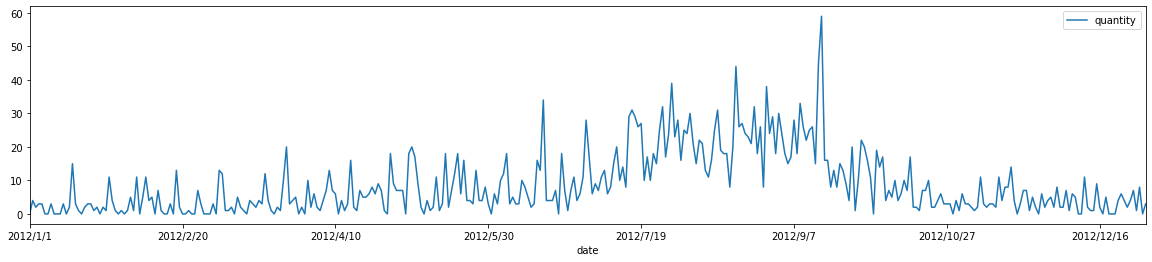

In [8]:
weather_garigari.plot(kind="line", x="date", y="quantity", figsize=(20,4))

### 相関（correlation = ピアソンの相関係数）を見る
- 行列形式の出力の見方： 行・列の表す項目間の相関係数を計算
- 行・列は，それぞれデータの属性を表している．
- 対称行列になる（行・列を入れ替えた場所の値は，同じもの）．
- 相関は，定量的なデータ同士で計算可能．そのため，数値データ同士のみ計算される．カテゴリカルデータは表示されない．
- 同じデータ同士の相関は，完全な正の相関で 1 となる（対角線）．
- NaN (Not a number) となる場合はどのような場合か

In [9]:
weather_garigari.corr()

,year,month,day,isHoliday,weekNumber,rainfall,AverageTemp,MaxTemp,MinTemp,SolarRadiation,quantity,price
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.006443,-0.019205,0.996354,0.020275,0.360209,0.355036,0.357646,-0.064533,0.220081,0.229336
day,NaN,0.006443,1.000000,-0.048212,0.089492,-0.050273,-0.003150,-0.011502,-0.001525,0.029634,-0.006764,-0.008840
isHoliday,NaN,-0.019205,-0.048212,1.000000,-0.022272,0.081339,-0.040813,-0.046519,-0.032673,-0.031542,-0.021064,-0.026587
weekNumber,NaN,0.996354,0.089492,-0.022272,1.000000,0.014726,0.356894,0.350926,0.354506,-0.061959,0.219335,0.228555
rainfall,NaN,0.020275,-0.050273,0.081339,0.014726,1.000000,0.014045,-0.024108,0.046635,-0.401840,-0.094294,-0.103027
AverageTemp,NaN,0.360209,-0.003150,-0.040813,0.356894,0.014045,1.000000,0.990918,0.991289,0.473764,0.688140,0.701315
MaxTemp,NaN,0.355036,-0.011502,-0.046519,0.350926,-0.024108,0.990918,1.000000,0.969548,0.542386,0.686406,0.701425
MinTemp,NaN,0.357646,-0.001525,-0.032673,0.354506,0.046635,0.991289,0.969548,1.000000,0.407637,0.687016,0.698134
SolarRadiation,NaN,-0.064533,0.029634,-0.031542,-0.061959,-0.401840,0.473764,0.542386,0.407637,1.000000,0.394068,0.406135


### データの統計的可視化
- 散布図： 2つのデータの関連
- ヒストグラム： データの分布

In [10]:
import seaborn as sns

ペアプロットで，散布図およびヒストグラム（分布）を確認

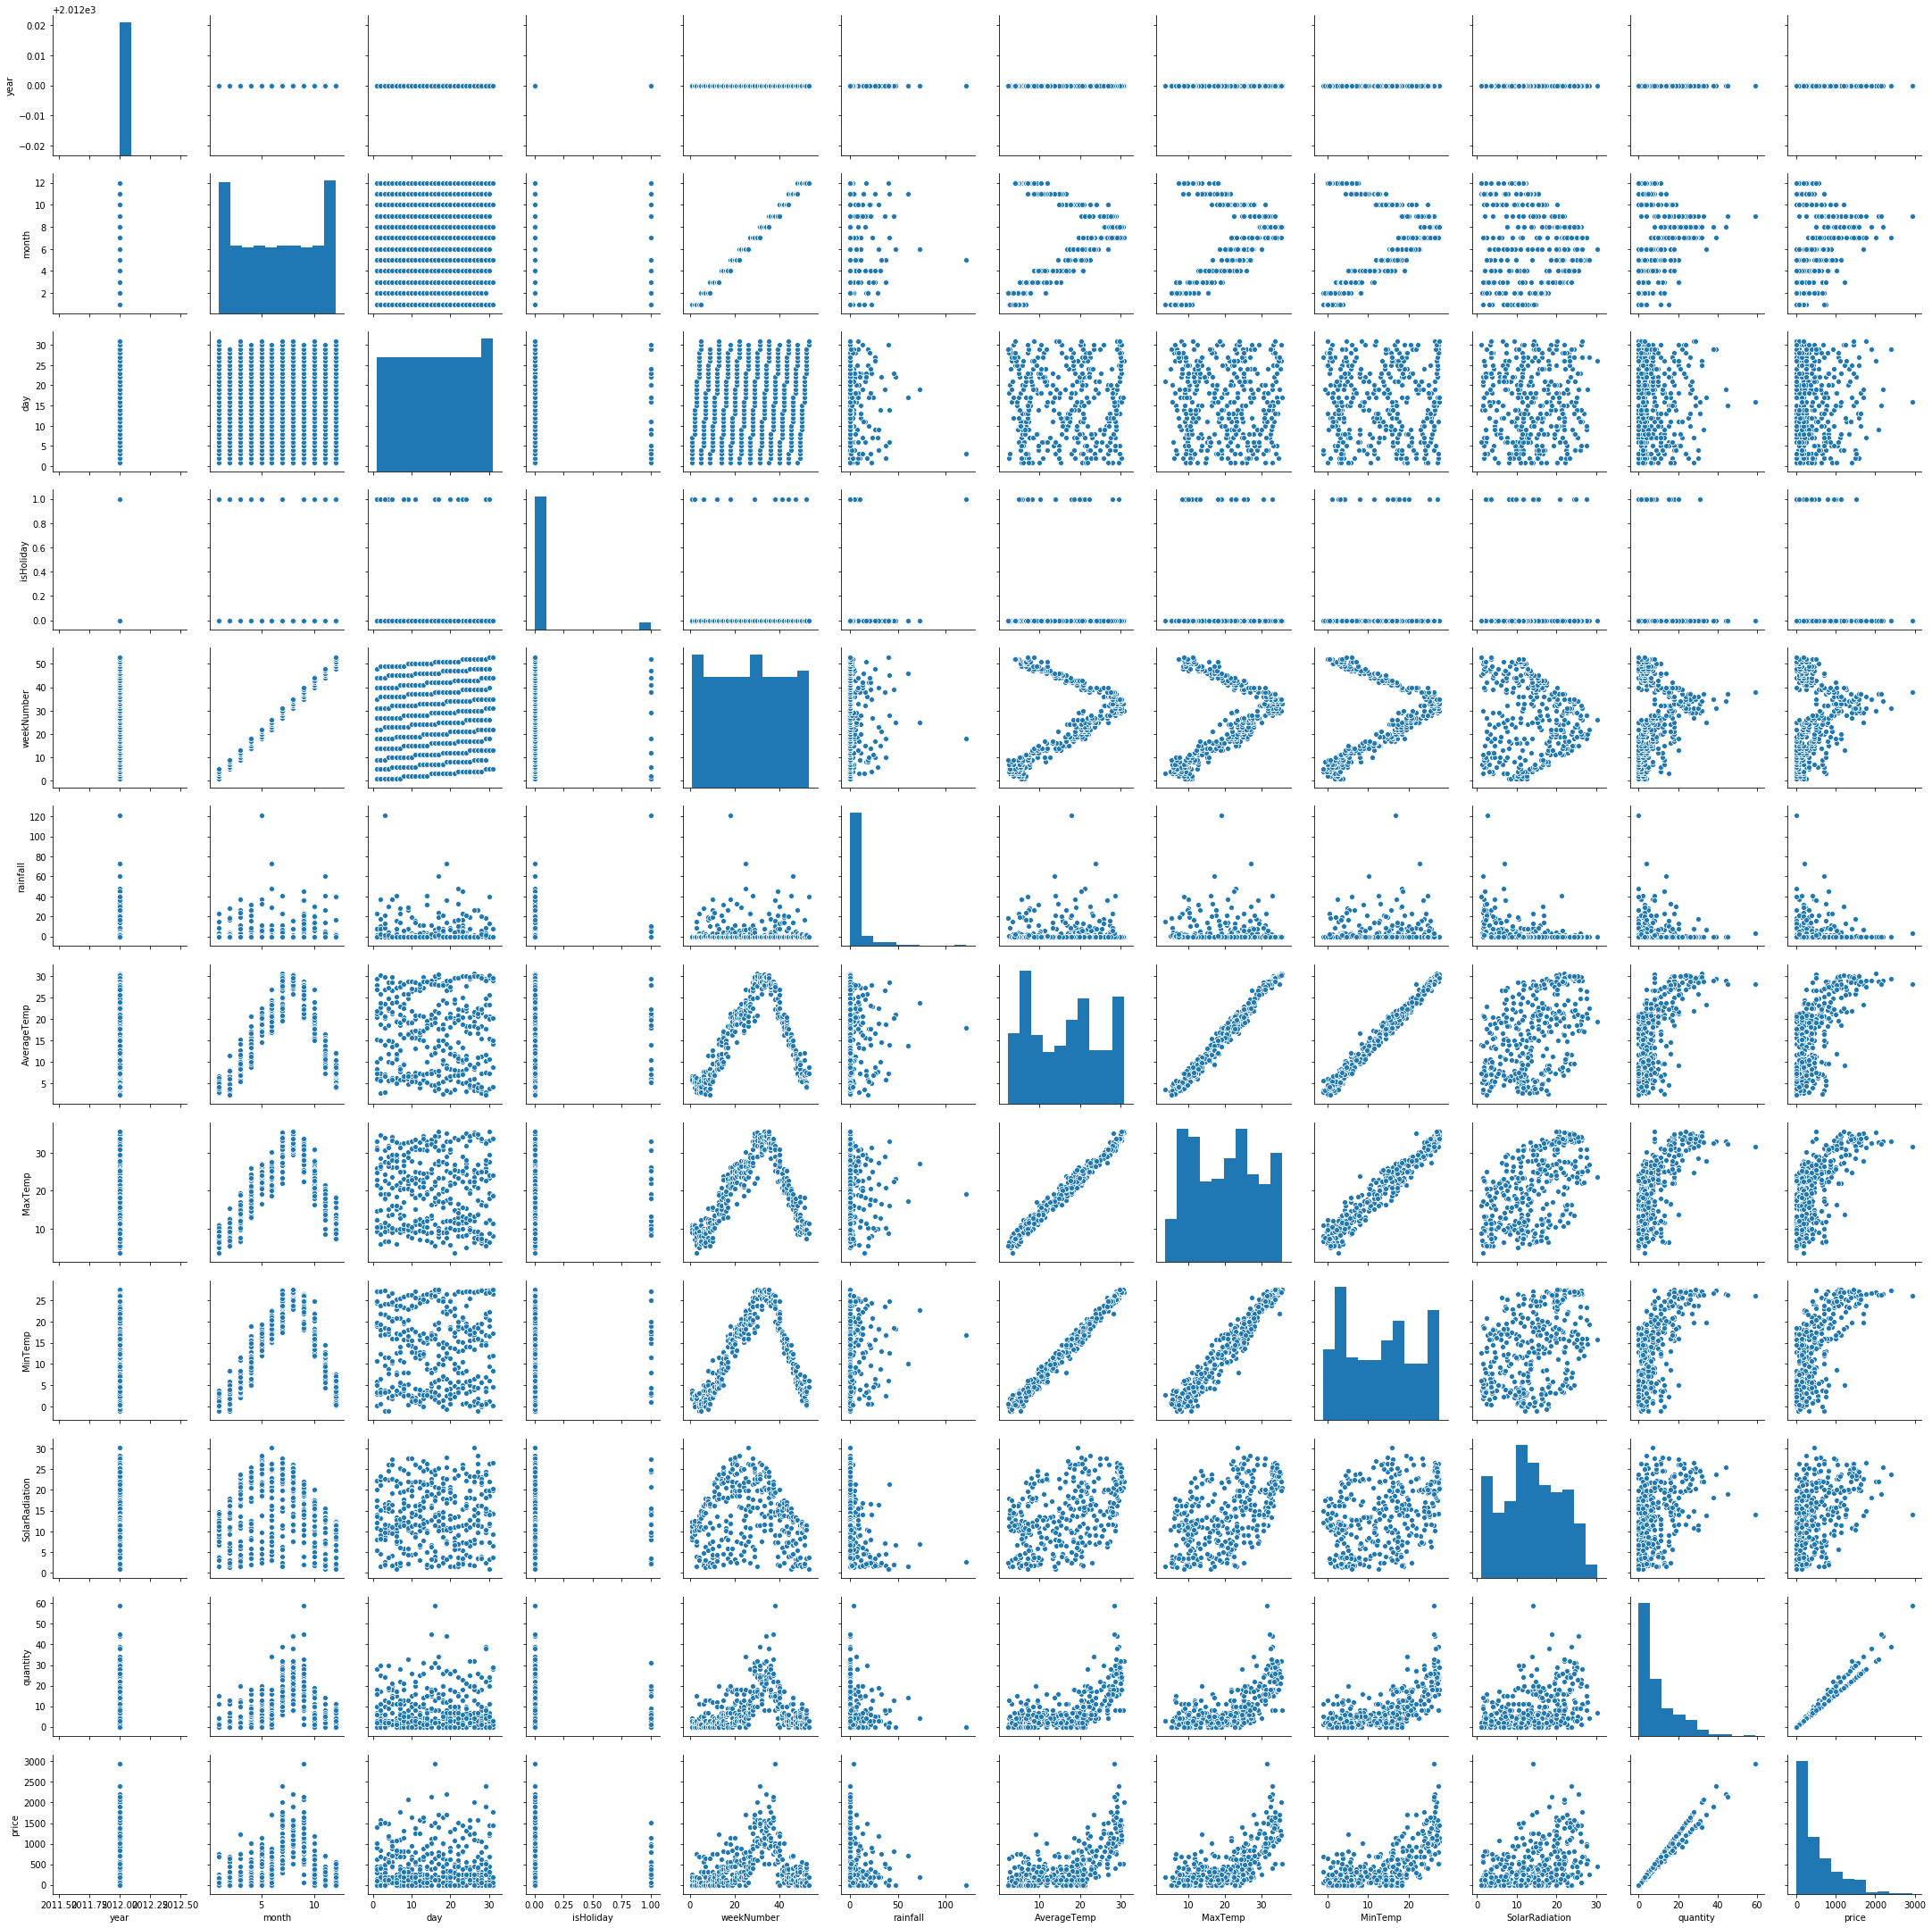

In [11]:
sns.pairplot(weather_garigari)

### 相関を可視化する
- 相関値に応じた色（ヒートマップ）表示を行う

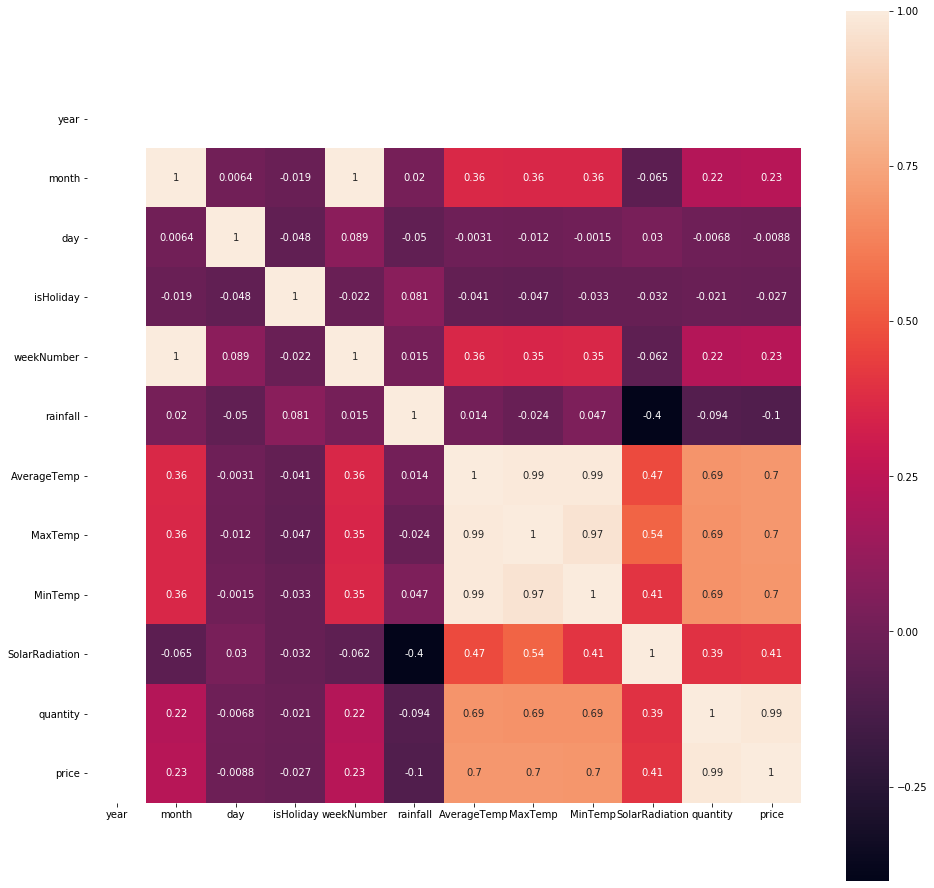

In [12]:
g_cor = weather_garigari.corr()
plt.figure(figsize=(16,16))
ax=plt.subplot(1,1,1)
sns.heatmap(g_cor, annot=True, square=True, ax=ax)

# 線形回帰で予測モデルを作る
- 線形回帰 (Linear Regression) は回帰の基本
- 統計では，説明変数が１つ（単変量）なら単回帰分析，多変量なら重回帰分析と呼ぶ
- 統計解析の最も基本的で重要な手法
- 古くから現在まで（文系理系問わず）ほとんど全ての分野の研究で用いられる
- 予測モデルが解釈可能
- AIにおいても同様に軽視できない
- ベースラインの見極めという意味でも大事
- データサイエンスでも重要な手法の一つ．
- データサイエンス: データから，データに内包される性質を見つけ出し，解釈あるいは予測などに関する知見を得る分野

## Scikit-Learn
- Python の代表的な機械学習ライブラリ
- ほとんどの機械学習手法，評価手法が備わっている
- 利用方法も簡単で，統一的
- 深層学習には非対応（ニューラルネット（＝パーセプトロンには対応））

ライブラリの import を行う．sklearn.linear_model から LinearRegression を読み込む．

In [13]:
from sklearn.linear_model import LinearRegression

オブジェクトインスタンス slr として，回帰モデルを定義する．

In [14]:
slr=LinearRegression()

## 単回帰
- 説明変数(モデルの入力)として，1つのデータのみ選択して使う．
- 目的変数(モデルの出力＝予測したいもの) は，ガリガリ君の販売個数 quantity
- 説明変数は x, 目的変数は y とおく．

### ここでは，MaxTemp(最高気温で回帰してみる)
- 変数の定義

確認もしてみる

In [15]:
x = weather_garigari[['MaxTemp']]

- x の内容を確認

### 目的変数（target）
- 予測対象は販売個数

In [17]:
y=weather_garigari[['quantity']]

### 回帰を行う

In [18]:
slr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

学習後のモデルで予測してみる
最高気温30度のガリガリ君売り上げ個数の予測の例： slr.predict([[30]])

In [21]:
slr.predict([[30]])

array([[15.99133719]])

### 回帰を図示する
- 単回帰（説明変数が１つ）の場合，横軸に説明変数(入力変数)，縦軸に目的変数(出力変数)としてその間の関係（入出力関係）を示した散布図(scatter plot)および回帰直線を描くことができる．

Text(0, 0.5, 'Sales')

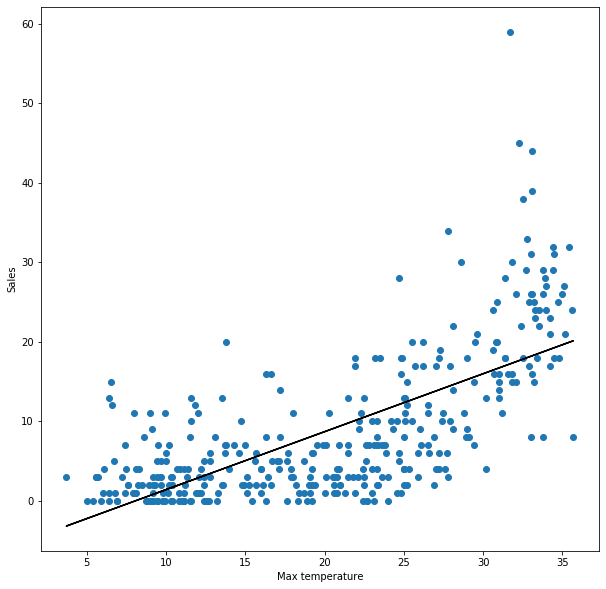

In [22]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
plt.scatter(x,y)
plt.plot(x,slr.predict(x),color="black")
plt.xlabel("Max temperature")
plt.ylabel("Sales")

## 定量的に評価する
- 誤差： (実際の値 - 予測値)
- 2乗誤差： (実際の値 - 予測値)^2
- 平均2乗誤差： Σ(実際の値 - 予測値)^2  /  データ数
- ↑これを MSE (Mean Squared Error) という．機械学習では，これを最小化するよう働く．
- MSE は2乗した値なので，実際の予測誤差がどれくらいか見積もりにくいので，MSEの平方根(Root)をとった，RMSE (Rooted MSE)も使われる．
### 2乗しないで，誤差の絶対値の平均を使うこともある
- 誤差の絶対値： |実際の値 - 予測値|
- 平均絶対誤差 |実際の値 - 予測値| / データ数
- ↑これを MAE (Mean Absolute Error)という．
- 予測誤差がどの程度か見積もりやすい．

以下の MSE, MAE, RMSE を１つずつ行ってみる(その順に)

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,slr.predict(x))

45.859925718204636

In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,slr.predict(x))

5.0344305060317485

In [26]:
np.sqrt(mean_squared_error(y,slr.predict(x)))

6.771995696853671

### 決定係数 $R^2$
回帰予測が，実データにどれくらい当てはまっているかをはかる指標
$$
R^2 = 1-\frac{\sum_{i=1}^N (y_{\textrm{true},i}-y_{\textrm{pred},i})^2}{\sum_{i=1}^N (y_{\textrm{true},i}-\bar{y})^2}
$$

In [27]:
from sklearn.metrics import r2_score
r2_score(y,slr.predict(x))

0.4711533538154695

### ピアソン (Pearson) の相関係数 (correlation coefficient) も見てみる

In [28]:
cor = weather_garigari[["MaxTemp","quantity"]].corr(method='pearson')
cor

,MaxTemp,quantity
MaxTemp,1.000000,0.686406
quantity,0.686406,1.000000


### 相関係数 cor を2乗してみる

In [29]:
cor**2

,MaxTemp,quantity
MaxTemp,1.000000,0.471153
quantity,0.471153,1.000000


---
---

### 1次式の係数（回帰係数）を見る
- 単回帰直線 $y = a x + b$
- $a$: 回帰係数 (coefficient) → 回帰直線の傾き
- $b$: 回帰直線の切片 (intercept) → 直線全体の高さ (バイアスとも呼ぶ)

In [30]:
slr.coef_

array([[0.72881605]])

In [31]:
slr.intercept_

array([-5.87314444])

- 回帰係数は，予測にどの程度その変数が寄与しているかを表す

## 重回帰分析
- ２つ以上の説明変数を使った線形回帰
### 他に取り入れると良い変数（属性）を考えてみる

- 下記は，MaxTemp と MinTemp の２つを使う例（いろいろ試せます）
- 意味を理解して使ってみる

In [32]:
x = weather_garigari[['MaxTemp','MinTemp']]
slr.fit(x, y)
slr.predict([[12,8]])

array([[3.87126964]])

MAE を求めてみる

In [33]:
mean_absolute_error(y,slr.predict(x))

4.963978979817437

MSE も求めてみる

In [34]:
mean_squared_error(y,slr.predict(x))

45.19080139308714

- 2次元のグラフを作ってみる


In [35]:
w1, w2 = slr.coef_[0]
w0 = slr.intercept_
x1, x2 = np.meshgrid(np.arange(-10, 40, 1), np.arange(-10, 40, 1))
y_pred = w1 * x1 + w2 * x2 + w0

### Matplotlibを使う

In [36]:
import matplotlib
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

グラフを描画

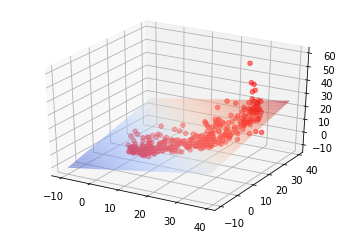

In [37]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, y_pred, cmap=cm.coolwarm, alpha=0.5)
ax.scatter(x['MaxTemp'], x['MinTemp'].values, y, c="r", marker="o", alpha=0.5)
plt.show()

## 数値指標では良い変数がもうない ⇒ カテゴリカルデータは？
- 非数値データ （曜日 "Mon", "Tue", "元日" 等）は，直接計算できない
- ダミー変数化して，数値化して取り扱う
- 下記は，すべてのカテゴリカル変数をダミー変数化

In [38]:
weather_garigari_dummy = pd.get_dummies(weather_garigari)

weather_garigari_dummy の内容を確認する．

In [39]:
weather_garigari_dummy

,year,month,day,isHoliday,weekNumber,rainfall,AverageTemp,MaxTemp,MinTemp,SolarRadiation,...,holidayName_y_憲法記念日,holidayName_y_成人の日,holidayName_y_振替休日,holidayName_y_敬老の日,holidayName_y_文化の日,holidayName_y_春分の日,holidayName_y_昭和の日,holidayName_y_海の日,holidayName_y_秋分の日,productName_赤城 ガリガリ君ソーダ １１３ｍｌ
0,2012,1,1,1,1,0.0,5.7,9.2,2.9,8.02,...,0,0,0,0,0,0,0,0,0,1
1,2012,1,2,1,1,0.0,6.0,10.9,3.0,8.14,...,0,0,1,0,0,0,0,0,0,1
2,2012,1,3,0,1,0.0,6.6,10.4,3.8,8.59,...,0,0,0,0,0,0,0,0,0,1
3,2012,1,4,0,1,0.0,5.4,9.4,2.0,10.49,...,0,0,0,0,0,0,0,0,0,1
4,2012,1,5,0,1,0.0,5.5,9.7,1.9,11.29,...,0,0,0,0,0,0,0,0,0,1
5,2012,1,6,0,1,0.0,6.3,9.8,2.9,9.89,...,0,0,0,0,0,0,0,0,0,1
6,2012,1,7,0,1,0.0,5.7,9.1,3.1,12.42,...,0,0,0,0,0,0,0,0,0,1
7,2012,1,8,0,2,0.0,5.8,9.6,2.6,12.34,...,0,0,0,0,0,0,0,0,0,1
8,2012,1,9,1,2,0.0,5.9,9.4,2.8,11.63,...,0,1,0,0,0,0,0,0,0,1
9,2012,1,10,0,2,0.0,6.7,9.8,2.5,9.73,...,0,0,0,0,0,0,0,0,0,1


データが大きすぎて（特に列数），全てを見ることができないので，shape メソッドで全体を眺める．  
何日分のデータか（データ数），属性はいくつあるかを確認する．

In [40]:
weather_garigari_dummy.shape

(366, 429)

- get_dummies メソッドでは，文字列型のみ，ダミー変数化される．
- 年 (2012) や月（1～12）など，数値の形をしているものはダミー変数化されない．
- 数値データは，これらは量的なデータである（カテゴリカルデータではない）と判断．

### 特徴を吟味する
- 曜日に着目してみる．

In [41]:
weather_garigari["dayOfWeek"].value_counts()

Sun    53
Mon    53
Wed    52
Fri    52
Thu    52
Tue    52
Sat    52
Name: dayOfWeek, dtype: int64

ダミー化のコード

In [42]:
exp_var = pd.get_dummies(weather_garigari["dayOfWeek"])

In [43]:
exp_var 

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0
7,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0
9,0,0,0,0,0,1,0


### 回帰を行う

In [44]:
slr=LinearRegression()
x=exp_var
y=weather_garigari['quantity']
slr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### MSE, MAEを評価してみる

In [47]:
mean_squared_error(y,slr.predict(x))

82.61571198343579

In [45]:
mean_absolute_error(y,slr.predict(x))

6.992657103825136

## さらにいくつか特徴を組み合わせる
### 特徴を4つ選択してダミー化

In [54]:
exp_var = pd.get_dummies(weather_garigari[["dayOfWeek","MaxTemp","isHoliday","holidayName_x"]])
exp_var

,MaxTemp,isHoliday,dayOfWeek_Fri,dayOfWeek_Mon,dayOfWeek_Sat,dayOfWeek_Sun,dayOfWeek_Thu,dayOfWeek_Tue,dayOfWeek_Wed,holidayName_x_こどもの日,...,holidayName_x_建国記念日,holidayName_x_憲法記念日,holidayName_x_成人の日,holidayName_x_振替休日,holidayName_x_敬老の日,holidayName_x_文化の日,holidayName_x_春分の日,holidayName_x_昭和の日,holidayName_x_海の日,holidayName_x_秋分の日
0,9.2,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.9,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,10.4,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.7,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9.8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9.1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9.6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9.4,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,9.8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### month のダミー化

In [49]:
exp_var2 = pd.get_dummies(weather_garigari["month"])

### 2つの特徴を結合

In [50]:
exp_var3 = pd.concat([exp_var, exp_var2], axis=1,join='inner')

### 再度回帰

In [51]:
slr=LinearRegression()
x=exp_var3
y=weather_garigari['quantity']
slr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### MAEを確認

In [52]:
mean_absolute_error(y,slr.predict(x))

3.9656292024205944

### 回帰係数を見てみる
```
slr.coef_```

In [53]:
slr.coef_

array([ 6.45724921e-01,  9.87622452e+11,  8.17820849e+11,  8.17820849e+11,
        8.17820849e+11,  8.17820849e+11,  8.17820849e+11,  8.17820849e+11,
        8.17820849e+11, -9.87622452e+11, -9.87622452e+11, -9.87622452e+11,
       -9.87622452e+11, -9.87622452e+11, -9.87622452e+11, -9.87622452e+11,
       -9.87622452e+11, -9.87622452e+11, -9.87622452e+11, -9.87622452e+11,
       -9.87622452e+11, -9.87622452e+11, -9.87622452e+11, -9.87622452e+11,
       -9.87622452e+11, -2.59594369e+11, -2.59594369e+11, -2.59594369e+11,
       -2.59594369e+11, -2.59594369e+11, -2.59594369e+11, -2.59594369e+11,
       -2.59594369e+11, -2.59594369e+11, -2.59594369e+11, -2.59594369e+11,
       -2.59594369e+11])

## 正則化
- 過剰に適応しないようにする手法
- 「誤差を小さく」が学習
- そのためになりふりかまわず，無茶をする（係数を無茶苦茶にする)
- 係数の大きさに制限を加える項（係数が大きくなると罰則になる項）を誤差の式に加える
- ||w_0^2 + w_1^2 + w_2^2 + ... || → L2正則化 → リッジ回帰(Ridge)
- ||w_0 + w_1 + w_2 + ... || → L1正則化 → LASSO
- 両方の項を加える elastic net もある

### L1正則化　：　LASSO
Lasso() のところにパラメータを入れて試行錯誤（例： Lasso(alpha=1E-1) 　）

In [55]:
from sklearn.linear_model import Lasso
slr_l1=Lasso()

In [56]:
x=exp_var3
y=weather_garigari['quantity']

In [57]:
slr_l1.fit(x, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

slr_l1.coef_ はどうなってますか？

In [58]:
slr_l1.coef_ 

array([ 0.71581526,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ])

mean_absolute_error(y,slr_l1.predict(x))　も観てみよう

In [59]:
mean_absolute_error(y,slr_l1.predict(x))

5.023755005008091

残差のplotを見てみる

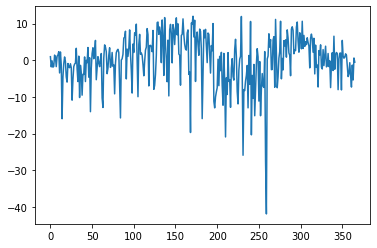

In [60]:
plt.plot((slr_l1.predict(x)-y))

実データと重ね合わせてみる

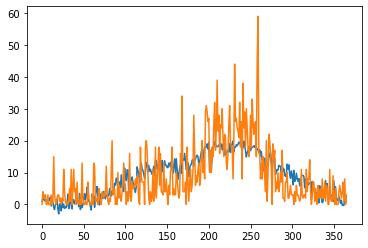

In [61]:
plt.plot(slr_l1.predict(x))
plt.plot(y)

### L2正則化　：　リッジ回帰

In [62]:
from sklearn.linear_model import Ridge
slr_l2=Ridge()
x=exp_var3
y=weather_garigari['quantity']
slr_l2.fit(x, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

同様に下記でモデルを確認してみる(try Lasso L2 Regression same way as above, as practice)